In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

In [416]:
train_df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/train.csv')

test_df = pd.read_csv('/Users/jonathanbeatty/Desktop/DataSets/Project_2/test.csv')


In [417]:
train_df.info()

train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [279]:
train_df.drop('Pool QC', axis = 1, inplace= True)
train_df.drop('Misc Feature', axis = 1, inplace = True)
train_df.drop('Fence', axis = 1, inplace = True)
train_df.drop('Alley', axis = 1, inplace = True)
train_df.drop('Lot Frontage', axis = 1, inplace = True)
train_df.drop('Bsmt Qual', axis = 1, inplace = True)
train_df.drop('Bsmt Cond', axis = 1, inplace = True)
train_df.drop('Bsmt Exposure', axis = 1, inplace = True)
train_df.drop('BsmtFin Type 1', axis = 1, inplace = True)
train_df.drop('BsmtFin Type 2', axis = 1, inplace = True)
train_df.drop('Electrical', axis = 1, inplace = True)
train_df.drop('Fireplace Qu', axis = 1, inplace = True)
train_df.drop('Garage Type', axis = 1, inplace = True)
train_df.drop('Garage Yr Blt', axis = 1, inplace = True)
train_df.drop('Garage Finish', axis = 1, inplace = True)
train_df.drop('Garage Qual', axis = 1, inplace = True)
train_df.drop('Garage Cond', axis = 1, inplace = True)
train_df.drop('Mas Vnr Type', axis = 1, inplace = True)

In [280]:
#Im dropping columns that have very few non null numbers in conjunction with 
#how they are usd according to the documentation for the data set
test_df.drop('Pool QC', axis = 1, inplace= True)
test_df.drop('Misc Feature', axis = 1, inplace = True)
test_df.drop('Fence', axis = 1, inplace = True)
test_df.drop('Alley', axis = 1, inplace = True)
test_df.drop('Lot Frontage', axis = 1, inplace = True)
test_df.drop('Bsmt Qual', axis = 1, inplace = True)
test_df.drop('Bsmt Cond', axis = 1, inplace = True)
test_df.drop('Bsmt Exposure', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 1', axis = 1, inplace = True)
test_df.drop('BsmtFin Type 2', axis = 1, inplace = True)
test_df.drop('Electrical', axis = 1, inplace = True)
test_df.drop('Fireplace Qu', axis = 1, inplace = True)
test_df.drop('Garage Type', axis = 1, inplace = True)
test_df.drop('Garage Yr Blt', axis = 1, inplace = True)
test_df.drop('Garage Finish', axis = 1, inplace = True)
test_df.drop('Garage Qual', axis = 1, inplace = True)
test_df.drop('Garage Cond', axis = 1, inplace = True)
test_df.drop('Mas Vnr Type', axis = 1, inplace = True)

In [287]:
train_df['Garage Cars'].fillna(0.0, inplace=True)#replacing all nan values with 0 in these columns
train_df['Garage Area'].fillna(0.0, inplace=True)
train_df['Bsmt Full Bath'].fillna(0.0, inplace=True)
train_df['Total Bsmt SF'].fillna(0.0, inplace=True)
train_df['Mas Vnr Area'].fillna(0.0, inplace=True)

In [281]:
test_df['Garage Cars'].fillna(0.0, inplace=True)#replacing all nan values with 0 in these columns
test_df['Garage Area'].fillna(0.0, inplace=True)
test_df['Bsmt Full Bath'].fillna(0.0, inplace=True)
test_df['Total Bsmt SF'].fillna(0.0, inplace=True)
test_df['Mas Vnr Area'].fillna(0.0, inplace=True)

In [296]:
train_df_num = train_df.select_dtypes(['number'])

In [404]:
features = [col for col in train_df_num.columns
            if col != 'SalePrice']

y = train_df['SalePrice']
X = train_df_dumm[features]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [405]:
train_df_num.fillna(0.0,inplace=True)

/Users/jonathanbeatty/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [312]:
train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 37 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
Lot Area           2051 non-null int64
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Mas Vnr Area       2051 non-null float64
BsmtFin SF 1       2051 non-null float64
BsmtFin SF 2       2051 non-null float64
Bsmt Unf SF        2051 non-null float64
Total Bsmt SF      2051 non-null float64
1st Flr SF         2051 non-null int64
2nd Flr SF         2051 non-null int64
Low Qual Fin SF    2051 non-null int64
Gr Liv Area        2051 non-null int64
Bsmt Full Bath     2051 non-null float64
Bsmt Half Bath     2051 non-null float64
Full Bath          2051 non-null int64
Half Bath          2051 non-null int64
Bedroom AbvGr      2051 non-null int64
Kitchen AbvGr      20

In [284]:
test_df_num = test_df.select_dtypes(['number'])

In [305]:
test_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 36 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
Lot Area           879 non-null int64
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Mas Vnr Area       879 non-null float64
BsmtFin SF 1       879 non-null float64
BsmtFin SF 2       879 non-null float64
Bsmt Unf SF        879 non-null float64
Total Bsmt SF      879 non-null float64
1st Flr SF         879 non-null int64
2nd Flr SF         879 non-null int64
Low Qual Fin SF    879 non-null int64
Gr Liv Area        879 non-null int64
Bsmt Full Bath     879 non-null float64
Bsmt Half Bath     879 non-null float64
Full Bath          879 non-null int64
Half Bath          879 non-null int64
Bedroom AbvGr      879 non-null int64
Kitchen AbvGr      879 non-null int64
TotRms 

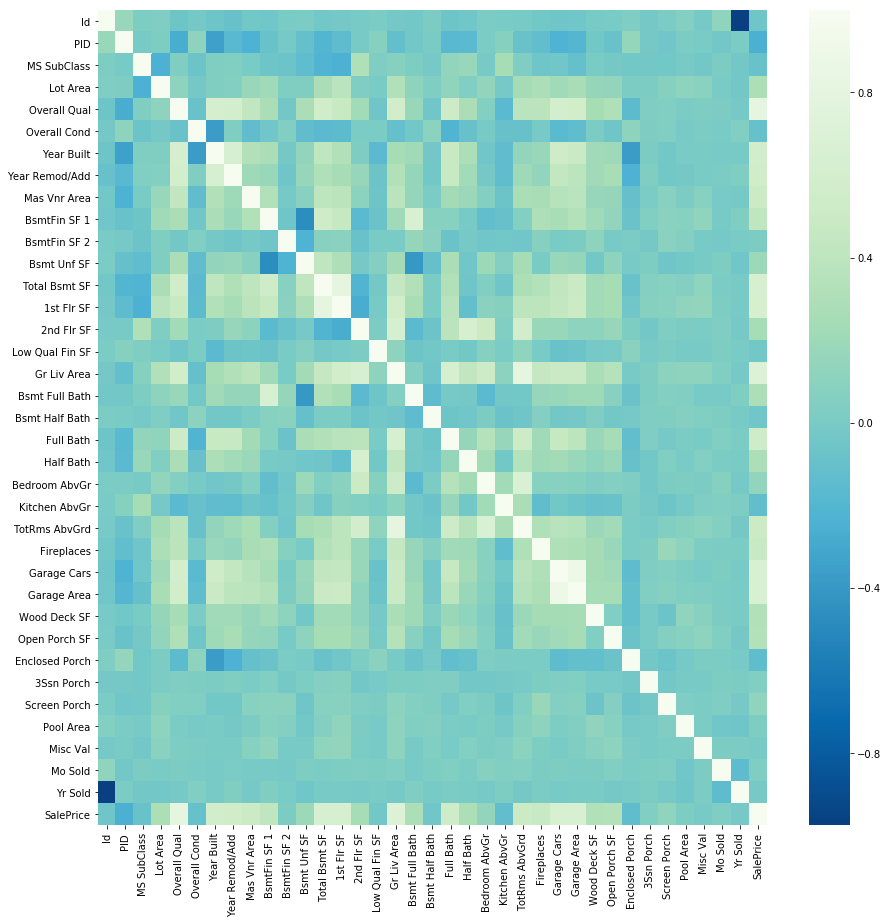

In [306]:
plt.figure(figsize =(15,15))
sns.heatmap(train_df.corr(), cmap="GnBu_r",)

In [308]:
# print('Ridge cross val score: ', cross_val_score(rcv, X_train, y_train, cv = 10).mean())
# print('Lasso cross val score: ', cross_val_score(lcv, X_train, y_train, cv = 10).mean())
# #print('ElasticNet cross val score: ', cross_val_score(regr, X_train, y_train, cv = 10).mean())

In [403]:

model=sm.OLS(y_train,X_train)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.9
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:47:08   Log-Likelihood:                -18102.
No. Observations:                1538   AIC:                         3.627e+04
Df Residuals:                    1504   BIC:                         3.645e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Id                 -0.7059      1.000     

score:  0.8376534224401233


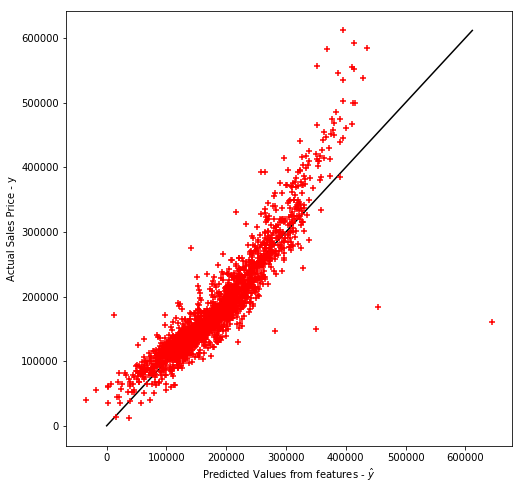

In [406]:
lr = LinearRegression()
model = lr.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Sales Price - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')


print("score: ", score)

In [407]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8359061327406023
0.8434537231345204


In [421]:
ss = StandardScaler()
ss.fit(test_df_dumm)
# X_train_scaled = ss.transform(X_train)
# X_test_scaled = ss.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [409]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [410]:

rcv = RidgeCV(alphas = np.logspace(0, 5, 50), cv = 10)

rcv.fit(X_train_scaled, y_train)

print(rcv.alpha_)#the best penalty term we found

rcv.score(X_train_scaled, y_train)

138.94954943731375


0.837818685225606

In [418]:
features = [col for col in test_df_dumm.columns
            if col != 'SalePrice']

X = test_df_dumm[features]

In [419]:
X_kaggle_s = ss.transform(X)
X_kaggle_s.shape

ValueError: operands could not be broadcast together with shapes (879,78) (36,) (879,78) 

In [350]:
# predictions = rcv.predict(X_kaggle_s)
# len(predictions)

879

In [401]:
predictions = lcv.predict(X_kaggle_s)
len(predictions)

ValueError: shapes (879,78) and (36,) not aligned: 78 (dim 1) != 36 (dim 0)

In [321]:
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(list(range(1, len(feature_names)+1)), coefs[-1], align='center', color=colors)
    ax2.set_xticks(list(range(1, len(feature_names)+1)))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()



In [322]:
from ipywidgets import *
from IPython.display import display
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 50)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train_scaled, y_train, r_alphas)

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.000001,5.0,0.05))

In [399]:
np.linspace(.25,1,5)

# A:

lcv = LassoCV(alphas = np.linspace(.25,1,50), cv = 10)

lcv.fit(X_train_scaled, y_train)

print(lcv.alpha_)#the best penalty term we found

lcv.score(X_train_scaled, y_train)

1.0


0.8345913285776977

In [ ]:
regr = ElasticNetCV(cv=5)

In [351]:
predictions.shape

(879,)

In [352]:
test_df['Id'].shape

(879,)

In [357]:
pred_dic = {'Id': test_df['Id'],
            'SalePrice': predictions
           }
pred_dic

preds_df = pd.DataFrame(data=pred_dic)
preds_df.info()

preds_df.shape

{'Id': 0      2658
 1      2718
 2      2414
 3      1989
 4       625
 5       333
 6      1327
 7       858
 8        95
 9      1568
 10     2482
 11     1364
 12     2584
 13      818
 14     2673
 15     2089
 16     1297
 17      790
 18     2616
 19      720
 20      222
 21      557
 22     1148
 23     2766
 24      534
 25     1452
 26      630
 27     2648
 28      125
 29     1904
        ... 
 849     933
 850    2784
 851     972
 852     599
 853    2614
 854    2582
 855    1409
 856     175
 857     352
 858     976
 859    2134
 860     984
 861    2396
 862    1673
 863     404
 864     607
 865     814
 866     868
 867    2271
 868    1633
 869     337
 870    2765
 871    1746
 872     368
 873    2806
 874    1662
 875    1234
 876    1373
 877    1672
 878    1939
 Name: Id, Length: 879, dtype: int64,
 'SalePrice': array([127149.89756302, 158826.32559029, 216463.25554437, 118539.39727818,
        195088.46448747,  68671.16321077, 105439.64675324, 137586.22401458

In [359]:
preds_df[['Id', 'SalePrice']].to_csv('kaggle_preds.csv', index=False)#without this it adds unnamed:0

In [368]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 63 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       20

In [367]:
train_df.fillna(0.0,inplace=True)

In [375]:
train_df_dumm = pd.get_dummies(train_df, columns=['MS Zoning', 'Street', 'Neighborhood', 'House Style'])

In [380]:
test_df_dumm = pd.get_dummies(test_df, columns=['MS Zoning', 'Street', 'Neighborhood', 'House Style'])

In [384]:
test_df_dumm = test_df_dumm.select_dtypes(['number'])

In [400]:
test_df_dumm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 78 columns):
Id                      879 non-null int64
PID                     879 non-null int64
MS SubClass             879 non-null int64
Lot Area                879 non-null int64
Overall Qual            879 non-null int64
Overall Cond            879 non-null int64
Year Built              879 non-null int64
Year Remod/Add          879 non-null int64
Mas Vnr Area            879 non-null float64
BsmtFin SF 1            879 non-null float64
BsmtFin SF 2            879 non-null float64
Bsmt Unf SF             879 non-null float64
Total Bsmt SF           879 non-null float64
1st Flr SF              879 non-null int64
2nd Flr SF              879 non-null int64
Low Qual Fin SF         879 non-null int64
Gr Liv Area             879 non-null int64
Bsmt Full Bath          879 non-null float64
Bsmt Half Bath          879 non-null float64
Full Bath               879 non-null int64
Half Bath            